In [127]:
import pandas as pd

In [128]:
data = pd.read_csv("Airbnb_Open_Data.csv")
data.head()

C:\Users\telmu\AppData\Local\Temp\ipykernel_15300\1113942449.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [129]:
list(data.columns)

['id',
 'NAME',
 'host id',
 'host_identity_verified',
 'host name',
 'neighbourhood group',
 'neighbourhood',
 'lat',
 'long',
 'country',
 'country code',
 'instant_bookable',
 'cancellation_policy',
 'room type',
 'Construction year',
 'price',
 'service fee',
 'minimum nights',
 'number of reviews',
 'last review',
 'reviews per month',
 'review rate number',
 'calculated host listings count',
 'availability 365',
 'house_rules',
 'license']

In [130]:
data["license"].unique

<bound method Series.unique of 0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
102594    NaN
102595    NaN
102596    NaN
102597    NaN
102598    NaN
Name: license, Length: 102599, dtype: object>

In [131]:
drop = ["id", "host id", "last review", "calculated host listings count", "house_rules", "license", "reviews per month"]

In [132]:
data = data.drop(columns= drop)


In [133]:
data.isnull().sum()

NAME                      250
host_identity_verified    289
host name                 406
neighbourhood group        29
neighbourhood              16
lat                         8
long                        8
country                   532
country code              131
instant_bookable          105
cancellation_policy        76
room type                   0
Construction year         214
price                     247
service fee               273
minimum nights            409
number of reviews         183
review rate number        326
availability 365          448
dtype: int64

In [134]:
print("Total columns before dropping : ", len(data.columns), "\n")
print("Columns with more than 50% missing values: ")
print(data.columns[data.isnull().mean() > 0.5], "\n")
data = data.drop(data.columns[data.isnull().mean() > 0.5], axis=1)
print("Total columns after dropping:", len(data.columns))

Total columns before dropping :  19 

Columns with more than 50% missing values: 
Index([], dtype='object') 

Total columns after dropping: 19


In [135]:
data['service fee'] = data['service fee'].str.replace('$', '')
data['service fee'] = data['service fee'].str.replace(',', '')
data['service fee'] = data['service fee'].astype(float)


In [136]:
data['price'] = data['price'].str.replace('$', '')
data['price'] = data['price'].str.replace(',', '')
data['price'] = data['price'].astype(float)

In [137]:
data.describe()

,lat,long,Construction year,price,service fee,minimum nights,number of reviews,review rate number,availability 365
count,102591.000000,102591.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,102273.000000,102151.000000
mean,40.728094,-73.949644,2012.487464,625.293536,125.026924,8.135845,27.483743,3.279106,141.133254
std,0.055857,0.049521,5.765556,331.671614,66.325739,30.553781,49.508954,1.284657,135.435024
min,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,1.000000,-10.000000
25%,40.688740,-73.982580,2007.000000,340.000000,68.000000,2.000000,1.000000,2.000000,3.000000
50%,40.722290,-73.954440,2012.000000,624.000000,125.000000,3.000000,7.000000,3.000000,96.000000
75%,40.762760,-73.932350,2017.000000,913.000000,183.000000,5.000000,30.000000,4.000000,269.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,5.000000,3677.000000


In [138]:
data = data.dropna(subset=['price','host_identity_verified', "Construction year", "instant_bookable", "lat", "long", "neighbourhood", "neighbourhood group", "review rate number"])

In [139]:
data["country"].unique()
data['country'] = data['country'].fillna("United States")
data["country code"].unique()
data['country code'] = data['country code'].fillna("US")
data['service fee'] = data['service fee'].fillna(0)
data['NAME'] = data['NAME'].fillna("Unkown")
data['host name'] = data['host name'].fillna("Unkown")
data["availability 365"] = data["availability 365"].fillna(365.0)
data["number of reviews"] = data["number of reviews"].fillna(0.0)
data["minimum nights"] = data["minimum nights"].fillna(0.0)
data["cancellation_policy"] = data["cancellation_policy"].fillna("flexible")

In [140]:
data.isnull().sum()

NAME                      0
host_identity_verified    0
host name                 0
neighbourhood group       0
neighbourhood             0
lat                       0
long                      0
country                   0
country code              0
instant_bookable          0
cancellation_policy       0
room type                 0
Construction year         0
price                     0
service fee               0
minimum nights            0
number of reviews         0
review rate number        0
availability 365          0
dtype: int64

In [141]:
data["review rate number"].unique()
## !!for review rate number get mean to change null values
## !!lets assume new listing are rated 0 
## !!client logs ikn and sees 0 as a review 

array([4., 3., 5., 2., 1.])

In [142]:
data["availability 365"].min()
## !!i assumed the availability is year around
## !!check outliers and fix the data

-10.0

In [143]:
data["number of reviews"].min()

0.0

In [144]:
data["instant_bookable"].describe()

count     101457
unique         2
top        False
freq       50963
Name: instant_bookable, dtype: object

Patterns, graphs

In [145]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

↓ Binning

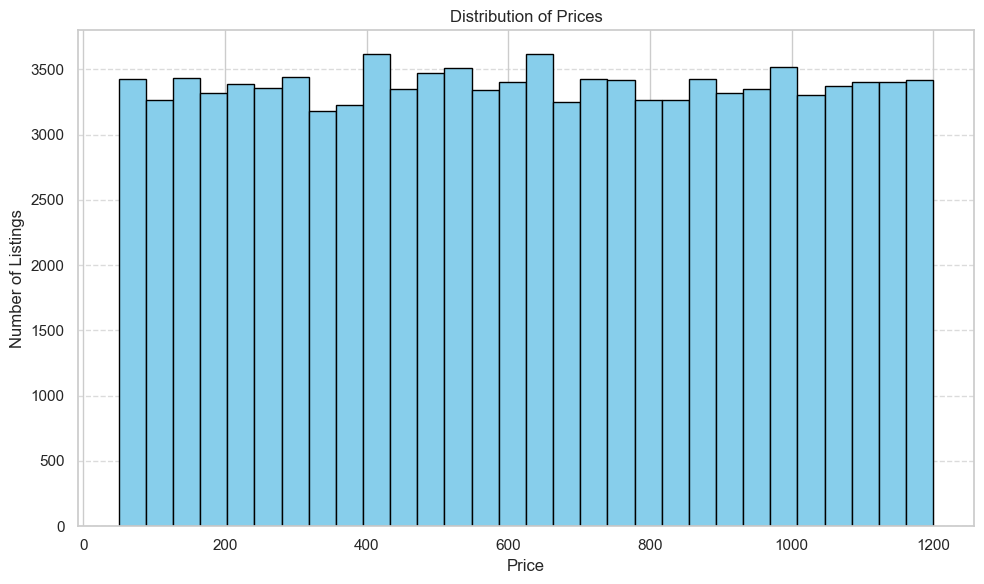

In [146]:
# Plot the histogram of prices
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Standard Deviation

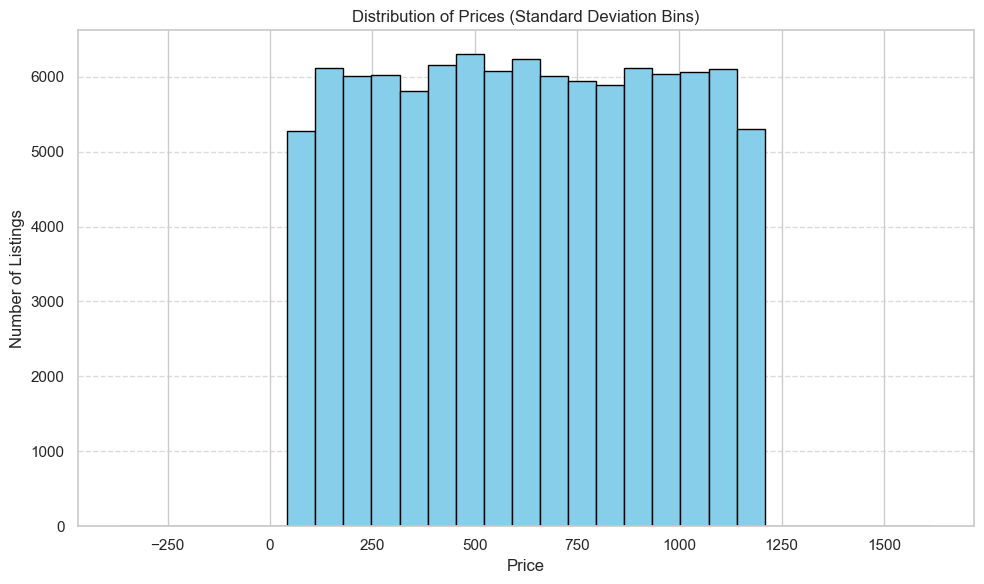

In [147]:
# Calculate mean and standard deviation of prices
mean_price = data['price'].mean()
std_price = data['price'].std()

# Define the bins based on standard deviations
num_bins = 30
bin_edges = np.linspace(mean_price - 3 * std_price, mean_price + 3 * std_price, num_bins)

# Plot the histogram of prices with standard deviation bins
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=bin_edges, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices (Standard Deviation Bins)')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [148]:
# Calculate the boundaries for each bin
cheap_boundary = mean_price - std_price
medium_boundary = mean_price + std_price

# Create a new column to label each listing as Cheap, Medium, or Expensive
data['std_price_category'] = pd.cut(data['price'], bins=[-np.inf, cheap_boundary, medium_boundary, np.inf], labels=['Cheap', 'Medium', 'Expensive'])

# Check the distribution of listings in each category
price_distribution = data['std_price_category'].value_counts()
print(price_distribution)

std_price_category
Medium       58598
Expensive    21456
Cheap        21403
Name: count, dtype: int64


In [149]:
# Group the data by price category and calculate the range of price values for each bin
price_ranges = data.groupby('std_price_category')['price'].agg(['min', 'max'])
print(price_ranges)

                      min     max
std_price_category               
Cheap                50.0   293.0
Medium              294.0   957.0
Expensive           958.0  1200.0


C:\Users\telmu\AppData\Local\Temp\ipykernel_15300\842828143.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_ranges = data.groupby('std_price_category')['price'].agg(['min', 'max'])


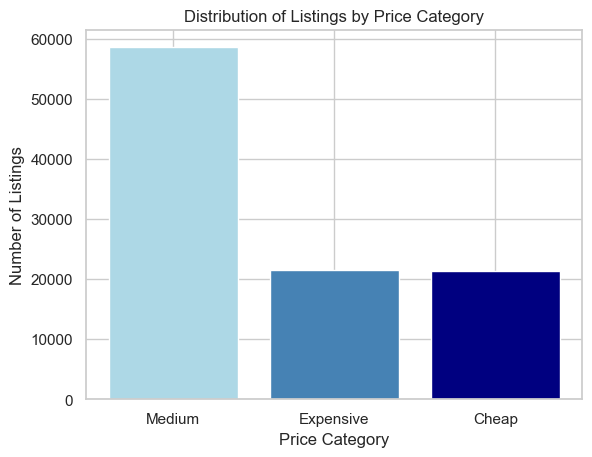

In [150]:
# Calculate the distribution of listings in each price category
price_distribution = data['std_price_category'].value_counts()

# Plot the bar chart
plt.bar(price_distribution.index, price_distribution.values, color=['#ADD8E6', '#4682B4', '#000080'])
plt.xlabel('Price Category')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listings by Price Category')
plt.show()

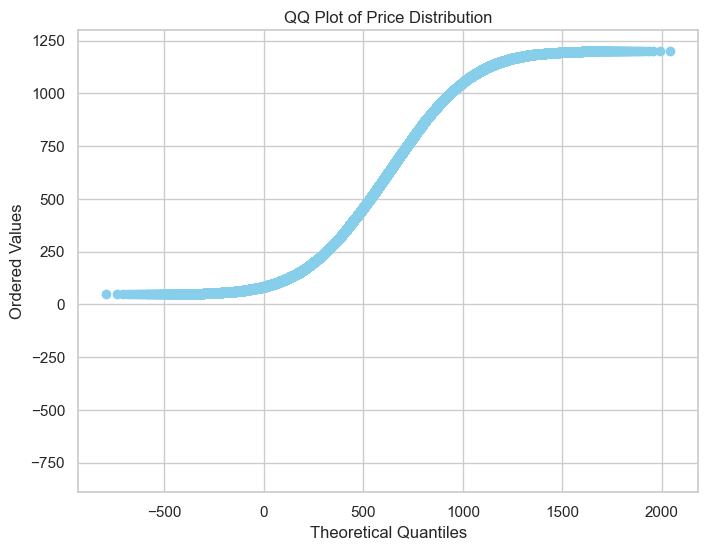

In [151]:
# Calculate the empirical cumulative distribution function (ECDF) of the price data
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

x, y = ecdf(data['price'])

# Generate theoretical quantiles for a normal distribution with the same mean and standard deviation as the price data
mean_price = np.mean(data['price'])
std_price = np.std(data['price'])
norm_quantiles = stats.norm.ppf(y, loc=mean_price, scale=std_price)

# Create a QQ plot
plt.figure(figsize=(8, 6))
plt.scatter(norm_quantiles, x, color='skyblue')
plt.plot([min(norm_quantiles), max(norm_quantiles)], [min(norm_quantiles), max(norm_quantiles)], color='red', linestyle='--')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('QQ Plot of Price Distribution')
plt.show()

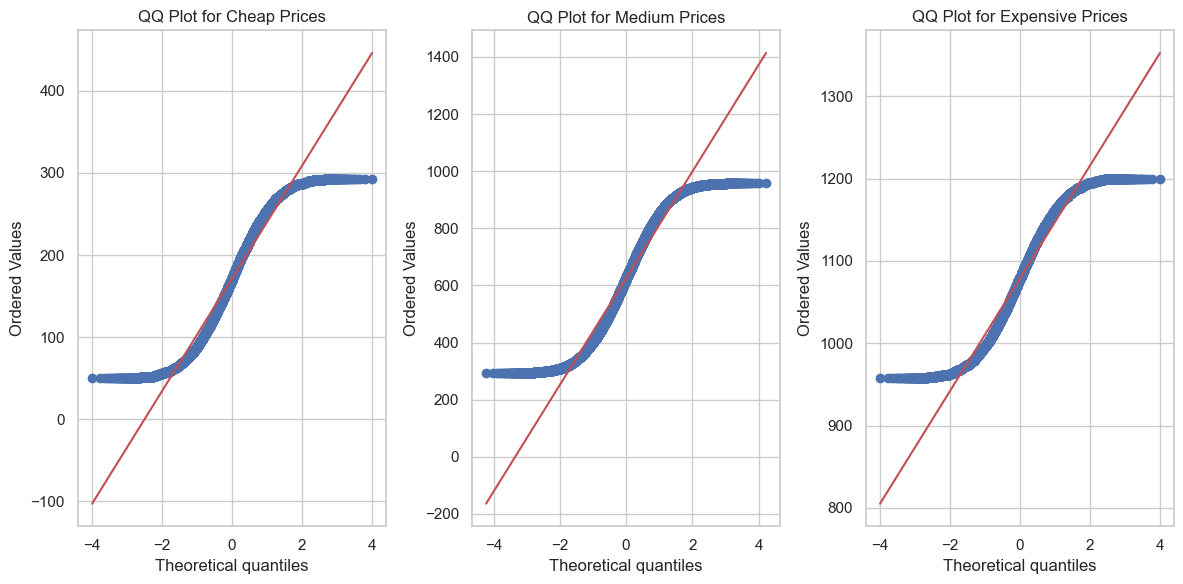

In [152]:
# Extract the prices for each category
cheap_prices = data[data['std_price_category'] == 'Cheap']['price']
medium_prices = data[data['std_price_category'] == 'Medium']['price']
expensive_prices = data[data['std_price_category'] == 'Expensive']['price']

# Create QQ plots for each price category
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
stats.probplot(cheap_prices, dist="norm", plot=plt)
plt.title('QQ Plot for Cheap Prices')

plt.subplot(1, 3, 2)
stats.probplot(medium_prices, dist="norm", plot=plt)
plt.title('QQ Plot for Medium Prices')

plt.subplot(1, 3, 3)
stats.probplot(expensive_prices, dist="norm", plot=plt)
plt.title('QQ Plot for Expensive Prices')

plt.tight_layout()
plt.show()

cut()

In [153]:
# Define the price bins
price_bins = pd.cut(data['price'], bins=3, labels=['Cheap', 'Medium', 'Expensive'])

# Add the price bins to the DataFrame
data['price_category'] = price_bins

In [154]:
# Get the unique categories (bins)
bin_ranges = price_bins.cat.categories

# Initialize a dictionary to store the range for each bin
bin_ranges_dict = {}

# Loop through each bin
for bin_range in bin_ranges:
    # Get the minimum and maximum values of the range
    min_value = data[data['price_category'] == bin_range]['price'].min()
    max_value = data[data['price_category'] == bin_range]['price'].max()
    
    # Store the range in the dictionary
    bin_ranges_dict[bin_range] = (min_value, max_value)

# Print the ranges for each bin
print("Ranges for each bin:")
for bin_range, (min_value, max_value) in bin_ranges_dict.items():
    print(f"{bin_range}: {min_value}-{max_value}")

Ranges for each bin:
Cheap: 50.0-433.0
Medium: 434.0-816.0
Expensive: 817.0-1200.0


In [155]:
# Check the value counts of the price categories
price_category_counts = data['price_category'].value_counts()

# Print the value counts
print(price_category_counts)

price_category
Medium       34051
Expensive    33766
Cheap        33640
Name: count, dtype: int64


Break (v1 starting below)

C:\Users\telmu\AppData\Local\Temp\ipykernel_15300\1517078910.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_category', y='availability 365', data=data, palette=color_mapping, order=['Cheap', 'Medium', 'Expensive'])


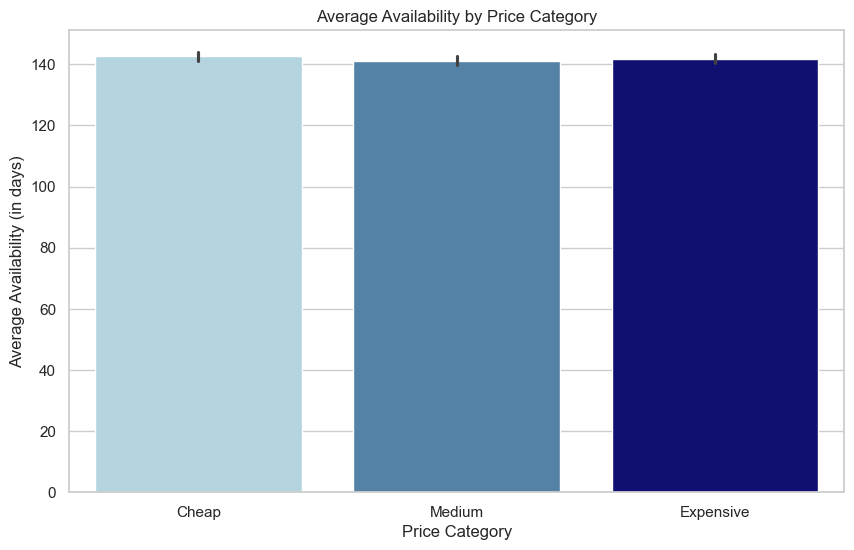

In [156]:
# Define the color mapping based on the average price within each bin
color_mapping = {'Cheap': '#ADD8E6', 'Medium': '#4682B4', 'Expensive': '#000080'}

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='price_category', y='availability 365', data=data, palette=color_mapping, order=['Cheap', 'Medium', 'Expensive'])
plt.title('Average Availability by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Availability (in days)')
plt.show()

Total Price

In [157]:
# Create a new column for total price by adding 'price' and 'service fee'
data['total_price'] = data['price'] + data['service fee']

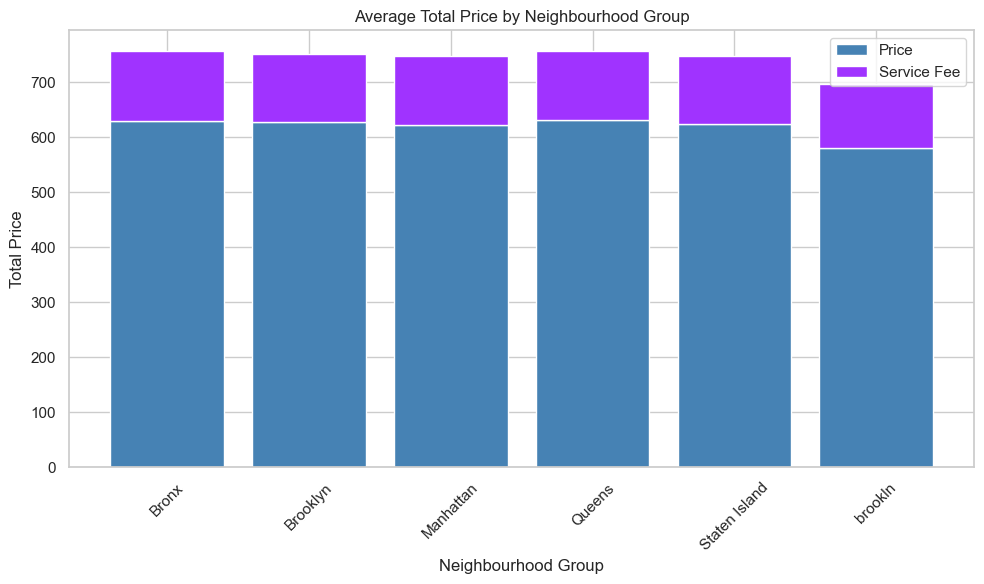

In [158]:
# Find the max and min values of the 'price' column
max_price = data['price'].max()
min_price = data['price'].min()

# Calculate the width of each bin
bin_width = (max_price - min_price) / 3

# Calculate the ranges for each bin
cheap_range = (min_price, min_price + bin_width)
medium_range = (min_price + bin_width, min_price + 2 * bin_width)
expensive_range = (min_price + 2 * bin_width, max_price)

# Define the color mapping based on the average price within each bin
color_mapping = {'Cheap': '#ADD8E6', 'Medium': '#4682B4', 'Expensive': '#000080'}

# Group by Neighborhood Group and calculate average total price, price, and service fee
grouped_data = data.groupby('neighbourhood group').agg({'total_price': 'mean', 'price': 'mean', 'service fee': 'mean', 'price_category': 'first'}).reset_index()

# Plot stacked bar chart for total price, with price and service fee components
plt.figure(figsize=(10, 6))
for idx, row in grouped_data.iterrows():
    # Determine the color based on the average price's bin
    if cheap_range[0] <= row['price'] <= cheap_range[1]:
        color = color_mapping['Cheap']
    elif medium_range[0] <= row['price'] <= medium_range[1]:
        color = color_mapping['Medium']
    elif expensive_range[0] <= row['price'] <= expensive_range[1]:
        color = color_mapping['Expensive']
    else:
        color = 'gray'  # Default color for values outside defined ranges
    
    # Plot the bar for the "price" component
    plt.bar(row['neighbourhood group'], row['price'], color=color, label='Price' if idx == 0 else None)
    
    # Plot the bar for the "service fee" component
    plt.bar(row['neighbourhood group'], row['service fee'], bottom=row['price'], color='#A033FF', label='Service Fee' if idx == 0 else None)

plt.xlabel('Neighbourhood Group')
plt.ylabel('Total Price')
plt.title('Average Total Price by Neighbourhood Group')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [159]:
# Filter the DataFrame for rows where the neighborhood group is "Manhattan"
manhattan_prices = data[data['neighbourhood group'] == 'Manhattan']['price']

# Calculate the average price for Manhattan
avg_price_manhattan = manhattan_prices.mean()

print("Average price in Manhattan:", avg_price_manhattan)

Average price in Manhattan: 622.4455166682058


C:\Users\telmu\AppData\Local\Temp\ipykernel_15300\711596798.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood group', y='price', data=data, palette=colors)
C:\Users\telmu\AppData\Local\Temp\ipykernel_15300\711596798.py:6: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='neighbourhood group', y='price', data=data, palette=colors)


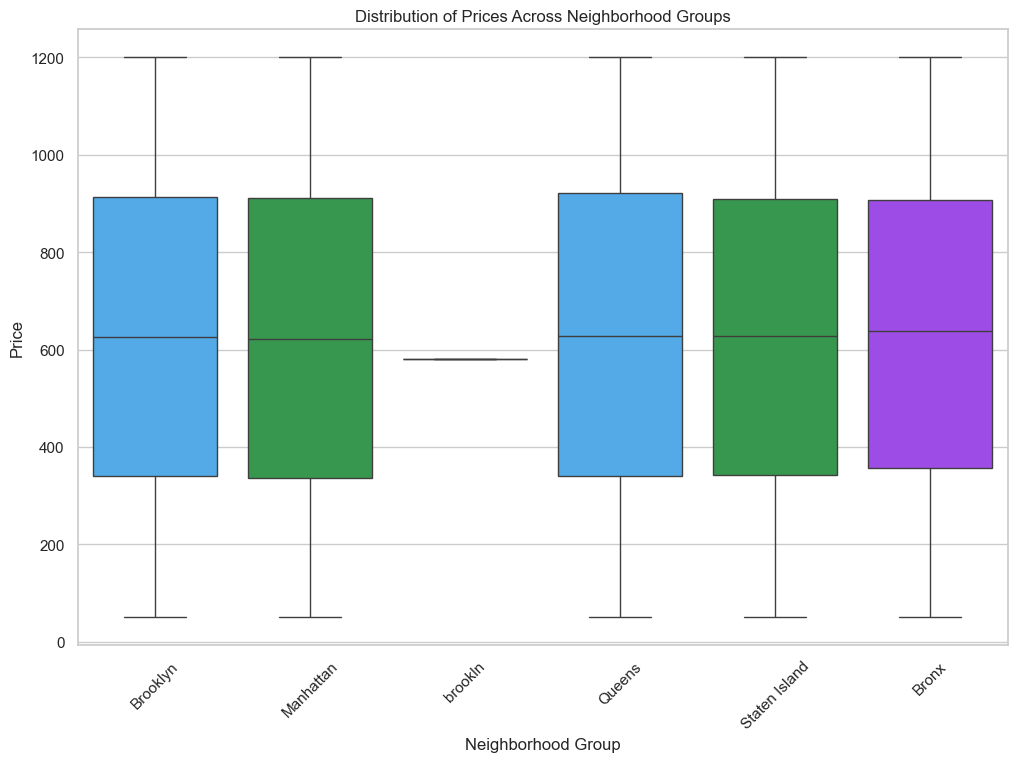

In [160]:
# Set the color palette
colors = ["#3AAFFF", "#28A745", "#A033FF"]

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood group', y='price', data=data, palette=colors)
plt.title('Distribution of Prices Across Neighborhood Groups')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Fix "brookln" typo

In [161]:
# Replace "brookln" with "Brooklyn" in the 'neighbourhood group' column
data['neighbourhood group'] = data['neighbourhood group'].replace('brookln', 'Brooklyn')

# Verify the change
print(data['neighbourhood group'].value_counts())

neighbourhood group
Manhattan        43316
Brooklyn         41376
Queens           13147
Bronx             2676
Staten Island      942
Name: count, dtype: int64


C:\Users\telmu\AppData\Local\Temp\ipykernel_15300\711596798.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood group', y='price', data=data, palette=colors)
C:\Users\telmu\AppData\Local\Temp\ipykernel_15300\711596798.py:6: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='neighbourhood group', y='price', data=data, palette=colors)


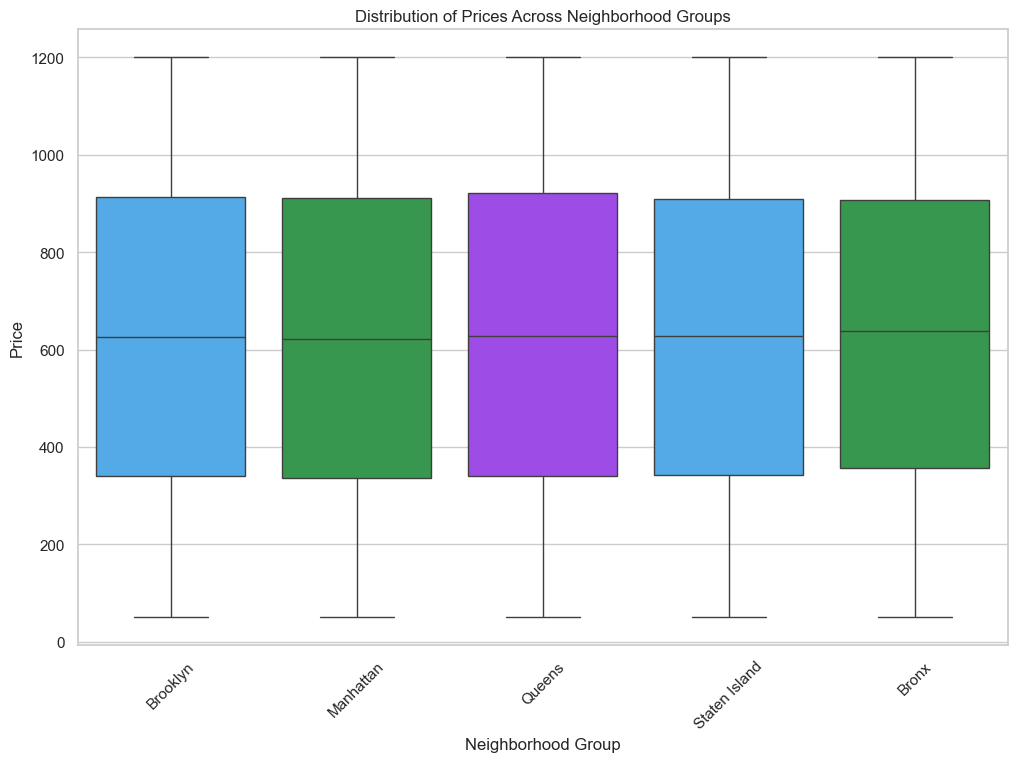

In [162]:
# Set the color palette
colors = ["#3AAFFF", "#28A745", "#A033FF"]

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood group', y='price', data=data, palette=colors)
plt.title('Distribution of Prices Across Neighborhood Groups')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

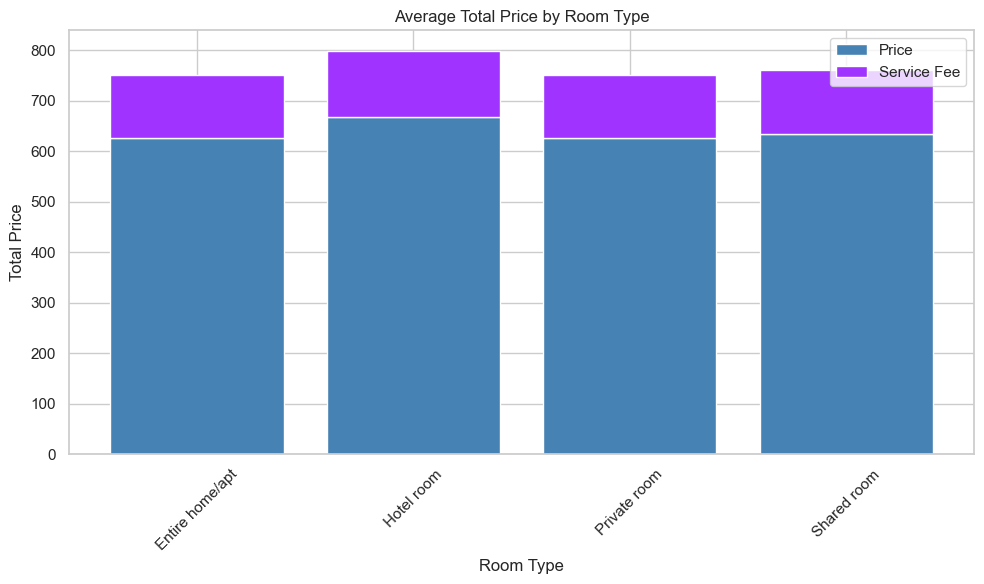

In [163]:
# Define the color mapping (using a single color for all price categories)
color_mapping = {'Price': '#4682B4', 'Service Fee': '#A033FF'}

# Group by Room Type and calculate average total price, price, and service fee
grouped_data = data.groupby('room type').agg({'total_price': 'mean', 'price': 'mean', 'service fee': 'mean'}).reset_index()

# Plot stacked bar chart for total price, with price and service fee components
plt.figure(figsize=(10, 6))
for idx, row in grouped_data.iterrows():
    # Plot the bar for the "price" component
    plt.bar(row['room type'], row['price'], color=color_mapping['Price'], label='Price' if idx == 0 else None)
    
    # Plot the bar for the "service fee" component
    plt.bar(row['room type'], row['service fee'], bottom=row['price'], color=color_mapping['Service Fee'], label='Service Fee' if idx == 0 else None)

plt.xlabel('Room Type')
plt.ylabel('Total Price')
plt.title('Average Total Price by Room Type')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\telmu\AppData\Local\Temp\ipykernel_15300\3059339216.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room type', y='price', data=data, palette=colors)
C:\Users\telmu\AppData\Local\Temp\ipykernel_15300\3059339216.py:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='room type', y='price', data=data, palette=colors)


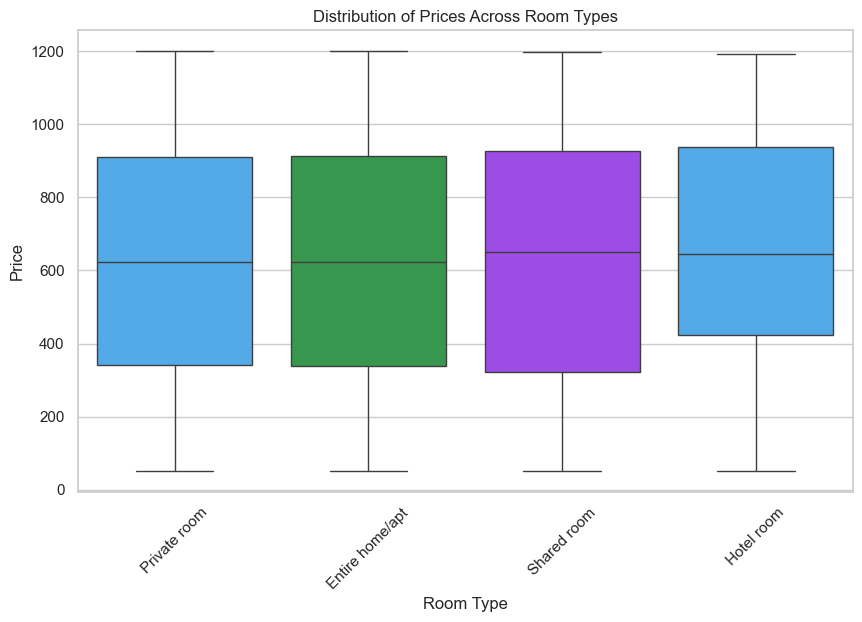

In [164]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='price', data=data, palette=colors)
plt.title('Distribution of Prices Across Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

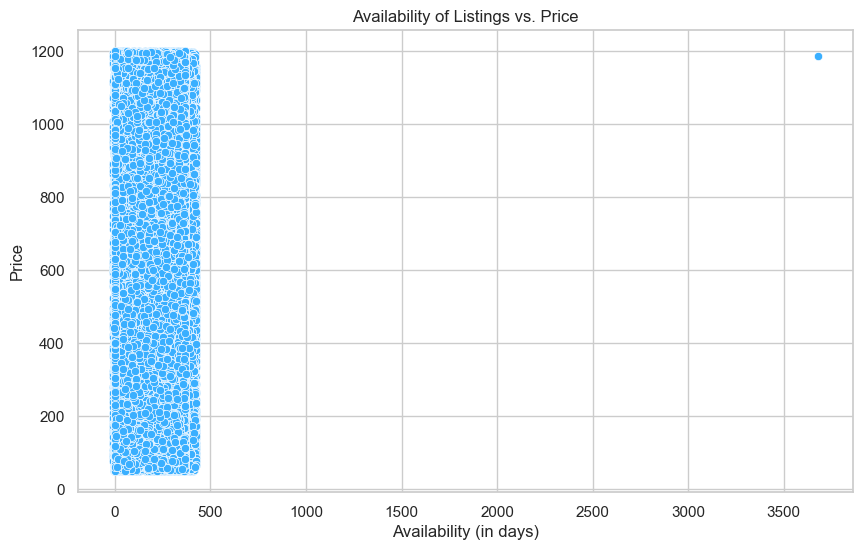

In [165]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(x='availability 365', y='price', data=data, color='#3AAFFF')

# Set the title and labels
plt.title('Availability of Listings vs. Price')
plt.xlabel('Availability (in days)')
plt.ylabel('Price')

# Show the plot
plt.show()

Therefore remove outliner above at cleaning

In [166]:
# Filter rows where 'availability 365' is above 365
above_365_count = len(data[data['availability 365'] > 365])

# Print the count
print("Number of rows of 'availability 365' above 365:", above_365_count)

Number of rows of 'availability 365' above 365: 2721


2721 rows of data have a value higher than 365, at "availability 365"?

In [167]:
# Filter the data to remove outliers in 'availability_365'
filtered_data = data[data['availability 365'] <= 366]

# Check the shape of the filtered data to verify outliers have been removed
print("Shape of filtered data:", filtered_data.shape)

Shape of filtered data: (98769, 22)


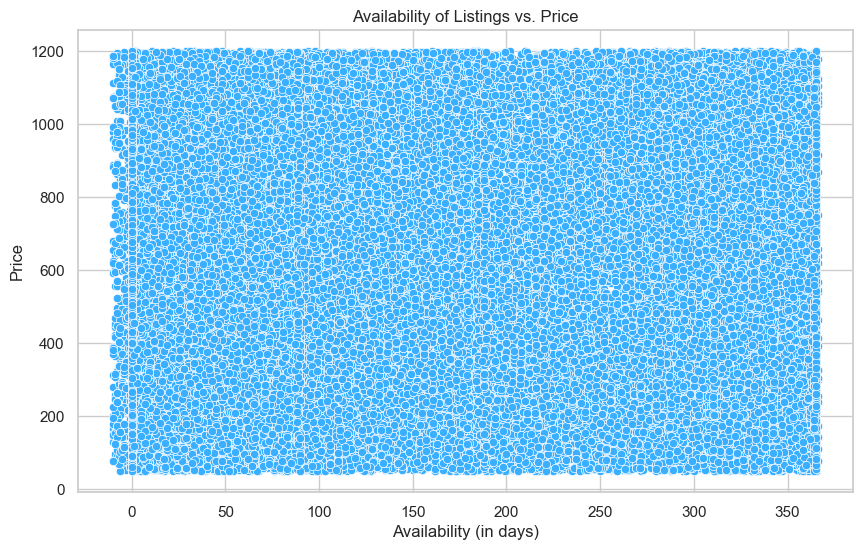

In [168]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot using the filtered dataset
sns.scatterplot(x='availability 365', y='price', data=filtered_data, color='#3AAFFF')

# Set the title and labels
plt.title('Availability of Listings vs. Price')
plt.xlabel('Availability (in days)')
plt.ylabel('Price')

# Show the plot
plt.show()

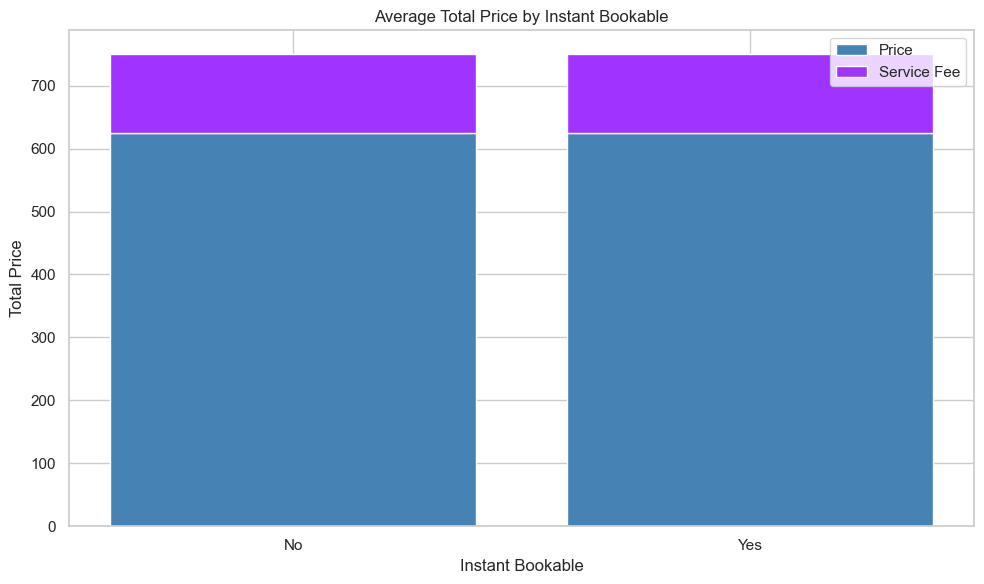

In [169]:
# Group by Instant Bookable and calculate average total price, price, and service fee
grouped_data = data.groupby('instant_bookable').agg({'total_price': 'mean', 'price': 'mean', 'service fee': 'mean'}).reset_index()

# Plot stacked bar chart for total price, with price and service fee components
plt.figure(figsize=(10, 6))
for idx, row in grouped_data.iterrows():
    # Plot the bar for the "price" component
    plt.bar(row['instant_bookable'], row['price'], color=color_mapping['Price'], label='Price' if idx == 0 else None)
    
    # Plot the bar for the "service fee" component
    plt.bar(row['instant_bookable'], row['service fee'], bottom=row['price'], color=color_mapping['Service Fee'], label='Service Fee' if idx == 0 else None)

plt.xlabel('Instant Bookable')
plt.ylabel('Total Price')
plt.title('Average Total Price by Instant Bookable')
plt.xticks([0, 1], ['No', 'Yes'])  # Customize x-axis labels
plt.legend()
plt.tight_layout()
plt.show()

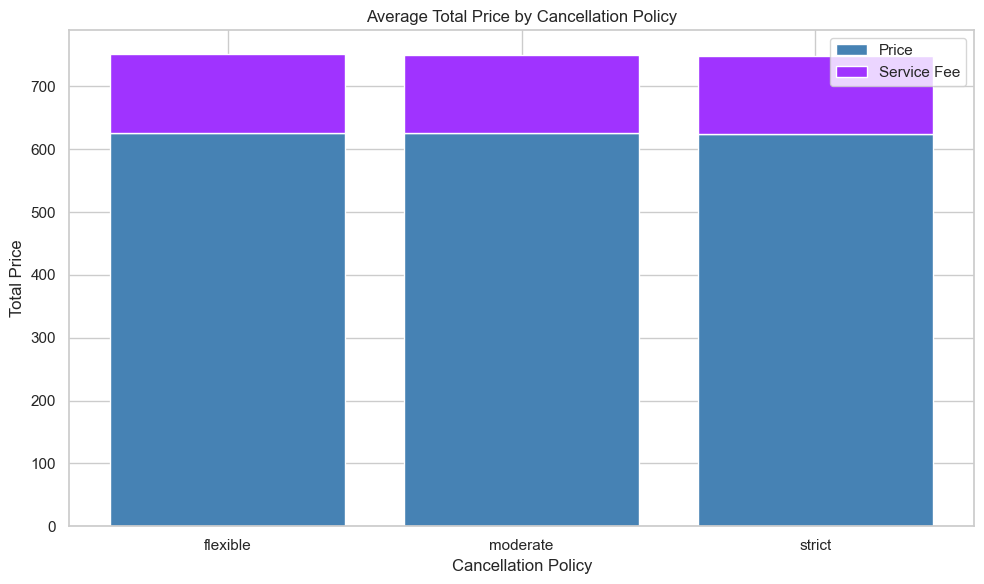

In [170]:
# Group by Cancellation Policy and calculate average total price, price, and service fee
grouped_data = data.groupby('cancellation_policy').agg({'total_price': 'mean', 'price': 'mean', 'service fee': 'mean'}).reset_index()

# Plot stacked bar chart for total price, with price and service fee components
plt.figure(figsize=(10, 6))
for idx, row in grouped_data.iterrows():
    # Plot the bar for the "price" component
    plt.bar(row['cancellation_policy'], row['price'], color=color_mapping['Price'], label='Price' if idx == 0 else None)
    
    # Plot the bar for the "service fee" component
    plt.bar(row['cancellation_policy'], row['service fee'], bottom=row['price'], color=color_mapping['Service Fee'], label='Service Fee' if idx == 0 else None)

plt.xlabel('Cancellation Policy')
plt.ylabel('Total Price')
plt.title('Average Total Price by Cancellation Policy')
plt.legend()
plt.tight_layout()
plt.show()

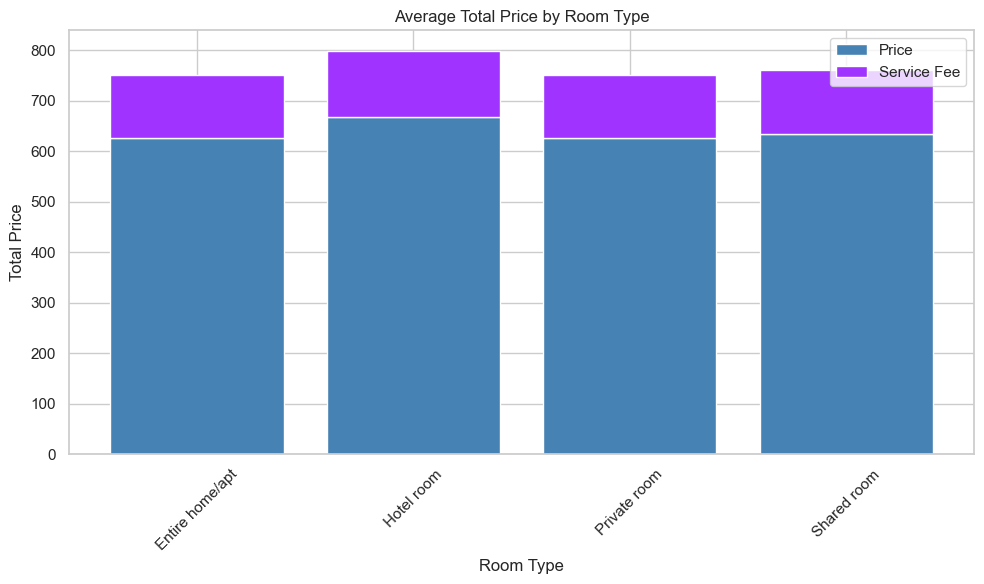

In [171]:
# Group by Room Type and calculate average total price, price, and service fee
grouped_data = data.groupby('room type').agg({'total_price': 'mean', 'price': 'mean', 'service fee': 'mean'}).reset_index()

# Plot stacked bar chart for total price, with price and service fee components
plt.figure(figsize=(10, 6))
for idx, row in grouped_data.iterrows():
    # Plot the bar for the "price" component
    plt.bar(row['room type'], row['price'], color=color_mapping['Price'], label='Price' if idx == 0 else None)
    
    # Plot the bar for the "service fee" component
    plt.bar(row['room type'], row['service fee'], bottom=row['price'], color=color_mapping['Service Fee'], label='Service Fee' if idx == 0 else None)

plt.xlabel('Room Type')
plt.ylabel('Total Price')
plt.title('Average Total Price by Room Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\telmu\AppData\Local\Temp\ipykernel_15300\1791385151.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Construction year", y="total_price", data=average_price_by_year, palette="viridis")


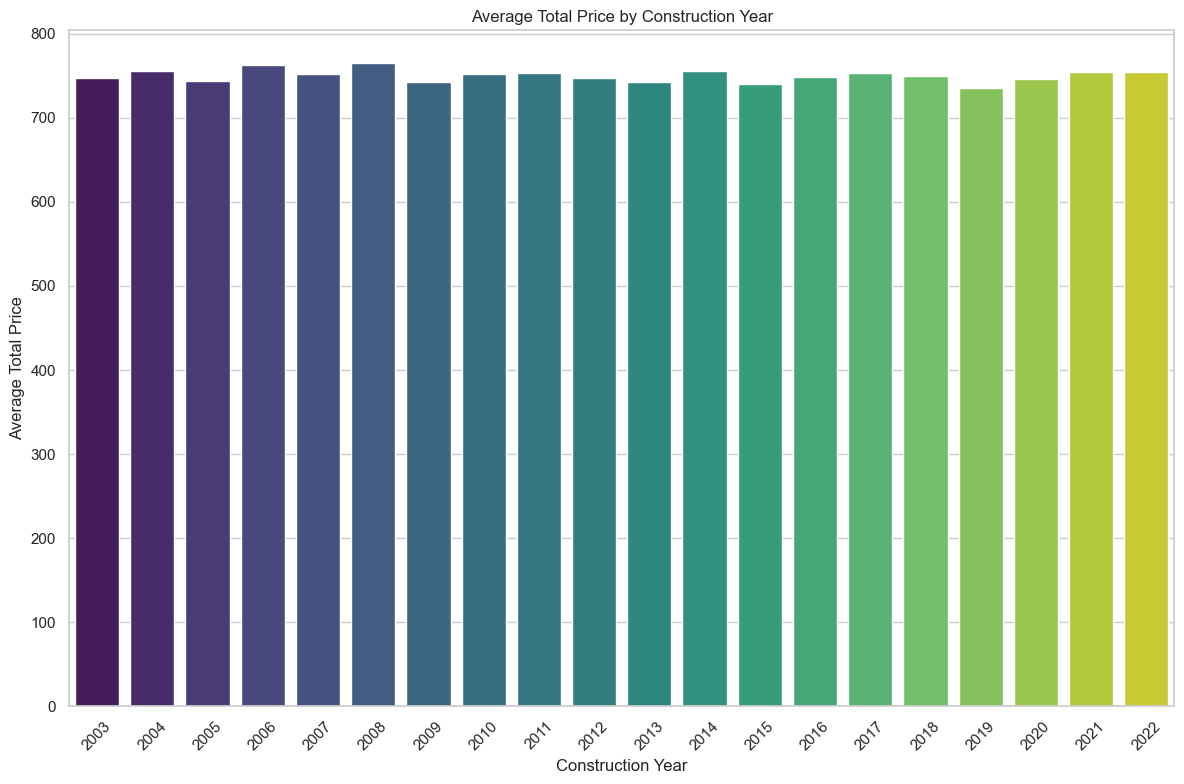

In [172]:
# Find the minimum and maximum construction years
min_construction_year = data['Construction year'].min()
max_construction_year = data['Construction year'].max()

# Filter the data to include only construction years within the range of min and max
filtered_data = data[(data['Construction year'] >= min_construction_year) & (data['Construction year'] <= max_construction_year)]
filtered_data['Construction year'] = filtered_data['Construction year'].astype(int)

# Group the filtered data by Construction year and calculate the average total price for each year
average_price_by_year = filtered_data.groupby('Construction year')['total_price'].mean().reset_index()

# Set the plot style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x="Construction year", y="total_price", data=average_price_by_year, palette="viridis")
plt.title('Average Total Price by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Average Total Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

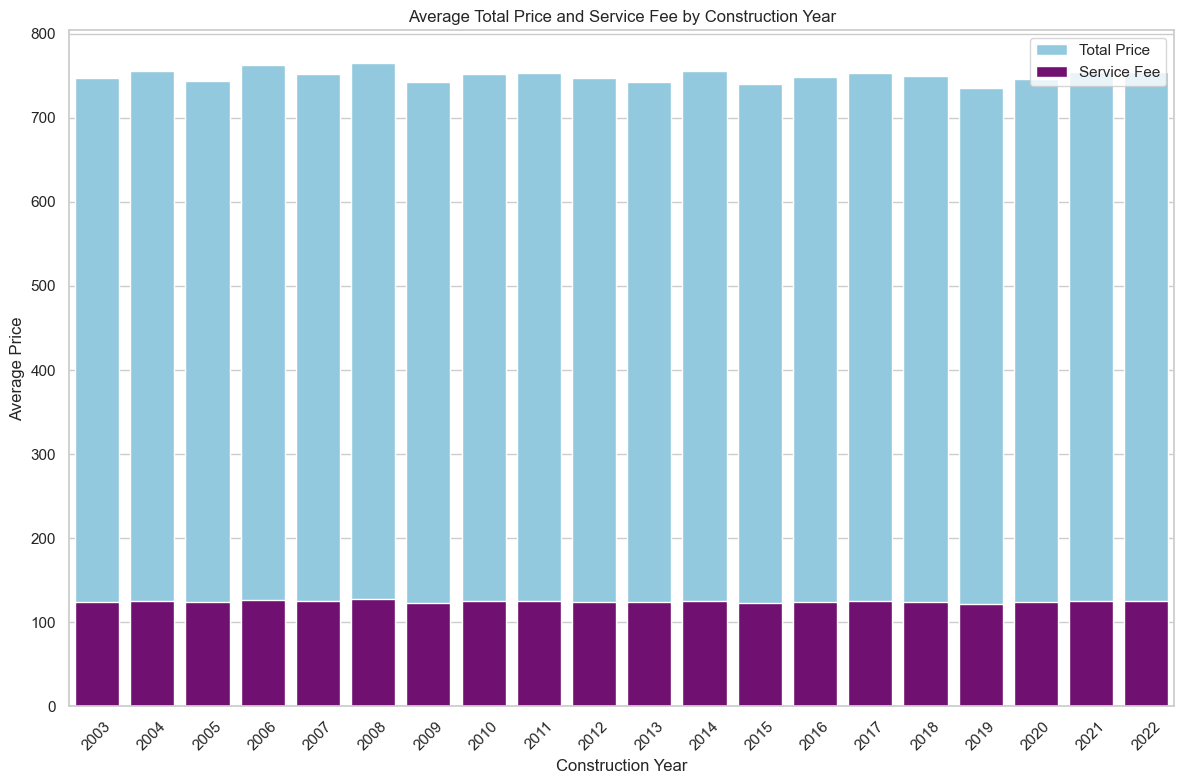

In [173]:
# Group the filtered data by Construction year and calculate the average total price and service fee for each year
average_price_by_year = filtered_data.groupby('Construction year').agg({'total_price': 'mean', 'service fee': 'mean'}).reset_index()

# Set the plot style
sns.set(style="whitegrid")

# Create the bar plot for total price and service fee
plt.figure(figsize=(12, 8))
sns.barplot(x="Construction year", y="total_price", data=average_price_by_year, color="skyblue", label="Total Price")
sns.barplot(x="Construction year", y="service fee", data=average_price_by_year, color="purple", label="Service Fee")

# Add labels and title
plt.title('Average Total Price and Service Fee by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


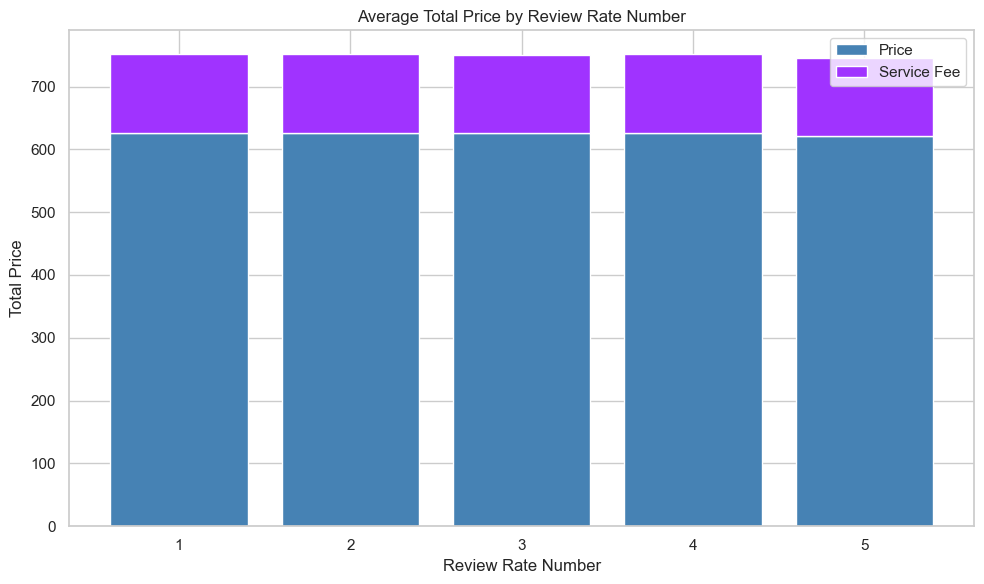

In [174]:
# Group by Review Rate Number and calculate average total price, price, and service fee
grouped_data = data.groupby('review rate number').agg({'total_price': 'mean', 'price': 'mean', 'service fee': 'mean'}).reset_index()

# Plot stacked bar chart for total price, with price and service fee components
plt.figure(figsize=(10, 6))
for idx, row in grouped_data.iterrows():
    # Plot the bar for the "price" component
    plt.bar(row['review rate number'], row['price'], color=color_mapping['Price'], label='Price' if idx == 0 else None)
    
    # Plot the bar for the "service fee" component
    plt.bar(row['review rate number'], row['service fee'], bottom=row['price'], color=color_mapping['Service Fee'], label='Service Fee' if idx == 0 else None)

plt.xlabel('Review Rate Number')
plt.ylabel('Total Price')
plt.title('Average Total Price by Review Rate Number')
plt.legend()
plt.tight_layout()
plt.show()

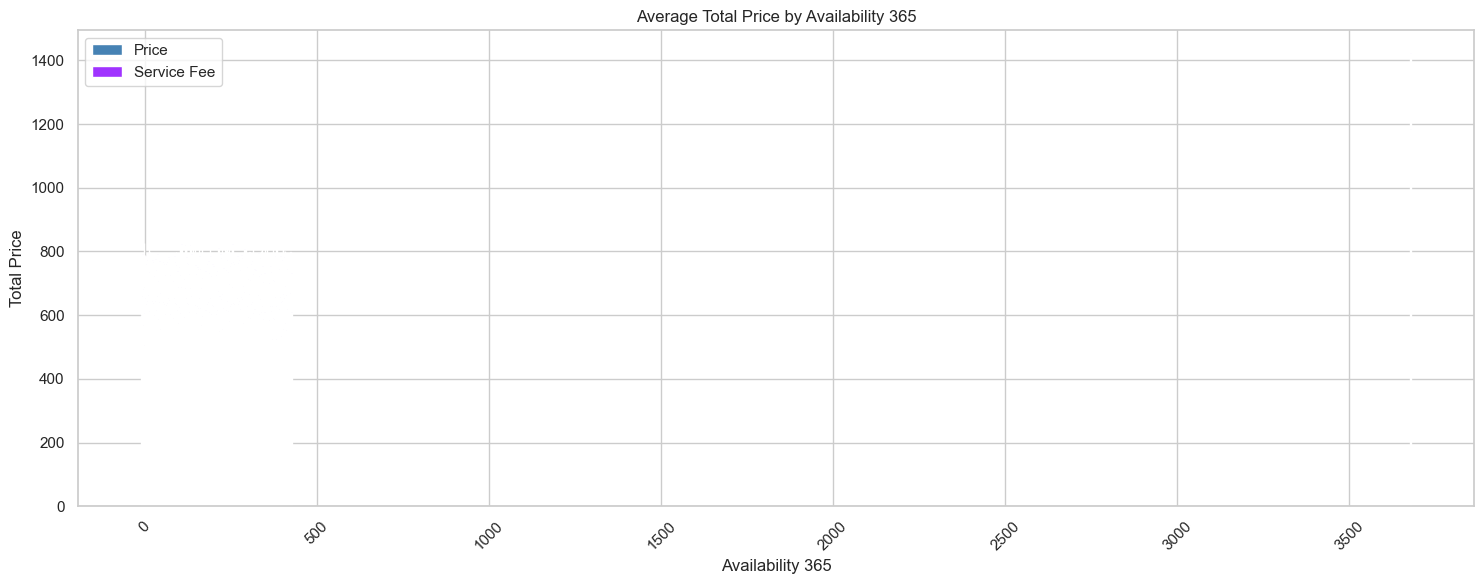

In [175]:
# Group by Availability 365 and calculate average total price, price, and service fee
grouped_data = filtered_data.groupby('availability 365').agg({'total_price': 'mean', 'price': 'mean', 'service fee': 'mean'}).reset_index()

# Plot stacked bar chart for total price, with price and service fee components
plt.figure(figsize=(15, 6))  # Adjusted width
for idx, row in grouped_data.iterrows():
    # Plot the bar for the "price" component
    plt.bar(row['availability 365'], row['price'], color=color_mapping['Price'], label='Price' if idx == 0 else None)
    
    # Plot the bar for the "service fee" component
    plt.bar(row['availability 365'], row['service fee'], bottom=row['price'], color=color_mapping['Service Fee'], label='Service Fee' if idx == 0 else None)

plt.xlabel('Availability 365')
plt.ylabel('Total Price')
plt.title('Average Total Price by Availability 365')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

Maps

Models


In [176]:
data = filtered_data
data.head()

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,...,Construction year,price,service fee,minimum nights,number of reviews,review rate number,availability 365,std_price_category,price_category,total_price
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,...,2020,966.0,193.0,10.0,9.0,4.0,286.0,Expensive,Expensive,1159.0
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,...,2007,142.0,28.0,30.0,45.0,4.0,228.0,Cheap,Cheap,170.0
3,Unkown,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,...,2005,368.0,74.0,30.0,270.0,4.0,322.0,Medium,Cheap,442.0
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,...,2009,204.0,41.0,10.0,9.0,3.0,289.0,Cheap,Cheap,245.0
5,Large Cozy 1 BR Apartment In Midtown East,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,...,2013,577.0,115.0,3.0,74.0,3.0,374.0,Medium,Medium,692.0


In [177]:
drop_for_model = ["host name","country code","country","NAME","price", "std_price_category", "total_price"]

In [178]:
data = data.drop(columns=drop_for_model)

In [179]:
data.head()

,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,service fee,minimum nights,number of reviews,review rate number,availability 365,price_category
0,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020,193.0,10.0,9.0,4.0,286.0,Expensive
1,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007,28.0,30.0,45.0,4.0,228.0,Cheap
3,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005,74.0,30.0,270.0,4.0,322.0,Cheap
4,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009,41.0,10.0,9.0,3.0,289.0,Cheap
5,verified,Manhattan,Murray Hill,40.74767,-73.97500,True,flexible,Entire home/apt,2013,115.0,3.0,74.0,3.0,374.0,Medium


In [210]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

In [181]:

df = pd.DataFrame(data)

In [182]:
feature_cols = ["host_identity_verified", "neighbourhood group", "neighbourhood", "lat", "long", "instant_bookable", "cancellation_policy", "room type", "Construction year", "service fee", "minimum nights", "number of reviews", "review rate number", "availability 365"]
target_col = "price_category"

In [183]:
label_encoder = LabelEncoder()
df[target_col] = label_encoder.fit_transform(df[target_col])

In [184]:
X = df[feature_cols]
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
categorical_features = ['host_identity_verified', 'neighbourhood group', 'neighbourhood', 'instant_bookable', 'cancellation_policy', 'room type']  
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

In [214]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

In [215]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [216]:
results = {}

In [217]:
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix
    }
    
    # Print results
    print(f"{name} - Accuracy: {accuracy:.2f}")
    print(f"{name} - Confusion Matrix:\n{conf_matrix}\n")

C:\Users\telmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.34
Logistic Regression - Confusion Matrix:
[[1747 2633 2433]
 [1613 2782 2337]
 [1702 2587 2458]]

XGBoost - Accuracy: 0.34
XGBoost - Confusion Matrix:
[[1423 2253 3137]
 [1291 2385 3056]
 [1363 2257 3127]]

Random Forest - Accuracy: 0.33
Random Forest - Confusion Matrix:
[[2164 2260 2389]
 [2174 2292 2266]
 [2111 2312 2324]]



In [218]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Assuming models is a dictionary of your models
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Perform 10-fold cross-validation
    # Calculate accuracy for each fold
    accuracies = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='accuracy')
    
    # Predict using cross-validation to get a confusion matrix
    y_pred = cross_val_predict(pipeline, X_train, y_train, cv=kf)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_train, y_pred)
    
    # Store results
    results[name] = {
        'Accuracy': accuracies.mean(),
        'Confusion Matrix': conf_matrix
    }
    
    # Print results
    print(f"{name} - Average Accuracy: {accuracies.mean():.2f} +/- {accuracies.std():.2f}")
    print(f"{name} - Confusion Matrix:\n{conf_matrix}\n")

C:\Users\telmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\telmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\telmu\AppData\Local\Packages\PythonSoftwareFoundation.Python

Logistic Regression - Average Accuracy: 0.34 +/- 0.00
Logistic Regression - Confusion Matrix:
[[ 7404  9656  9767]
 [ 7045 10151  9838]
 [ 7180  9955 10169]]



C:\Users\telmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\telmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\telmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\telmu\AppData\Local\Packages

XGBoost - Average Accuracy: 0.34 +/- 0.00
XGBoost - Confusion Matrix:
[[ 5187 10271 11369]
 [ 5053 10658 11323]
 [ 5140 10475 11689]]



C:\Users\telmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\telmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\telmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\telmu\AppData\Local\Packages

Random Forest - Average Accuracy: 0.34 +/- 0.00
Random Forest - Confusion Matrix:
[[8867 8780 9180]
 [8653 8949 9432]
 [8738 9044 9522]]



In [192]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clusterer', KMeans(n_clusters=3, random_state=42))
])

In [193]:
pipeline.fit(df[feature_cols])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['host_identity_verified',
                                                   'neighbourhood group',
                                                   'neighbourhood',
                                                   'instant_bookable',
                                                   'cancellation_policy',
                                                   'room type'])])),
                ('clusterer', KMeans(n_clusters=3, random_state=42))])

In [194]:
labels = pipeline['clusterer'].labels_


centroids = pipeline['clusterer'].cluster_centers_

df['cluster_label'] = labels


print("Cluster centroids:\n", centroids)
print("\nCluster counts:\n", df['cluster_label'].value_counts())

Cluster centroids:
 [[4.99639025e-01 0.00000000e+00 7.22447659e-01 2.17082825e-01
  1.59326844e-02 1.49368916e-04 7.96634220e-04 3.26122134e-03
  2.99982574e-02 0.00000000e+00 2.04137519e-03 0.00000000e+00
  1.49368916e-04 7.46844582e-05 5.22791207e-04 2.19074411e-03
  6.22370485e-04 0.00000000e+00 5.97475665e-04 3.73422291e-04
  7.21949762e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.74263736e-04 2.01648037e-03 0.00000000e+00
  8.96213498e-04 0.00000000e+00 0.00000000e+00 2.24053374e-04
  0.00000000e+00 1.26963579e-03 0.00000000e+00 0.00000000e+00
  3.73422291e-04 2.24053374e-04 3.91346561e-02 0.00000000e+00
  1.30448854e-02 8.21529040e-04 1.99158555e-03 9.95792776e-04
  6.72160123e-04 7.46844582e-04 0.00000000e+00 4.97896388e-05
  0.00000000e+00 7.46844582e-04 0.00000000e+00 9.70897956e-04
  2.19074411e-03 1.19495133e-03 0.00000000e+00 2.58906122e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.06300879e-02
  2.73843013e-04 3.48527471e-04 0.00000000e+00 0.0

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

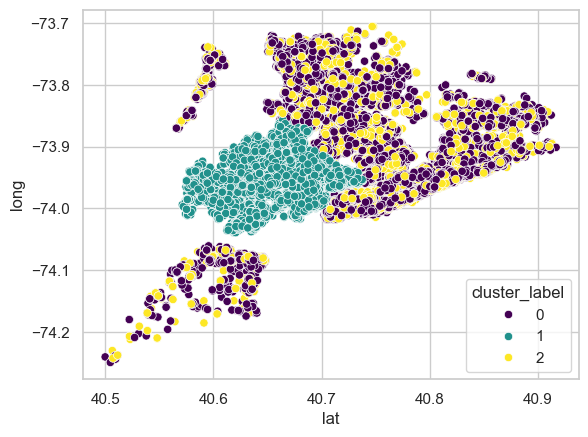

In [196]:
sns.scatterplot(data=df, x='lat', y='long', hue='cluster_label', palette='viridis')
plt.show()